In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import json

In [ ]:
data = []
for line in open('/content/drive/My Drive/data/Electronics_5.json', 'r'):
    data.append(json.loads(line))

In [ ]:
reviews = []
for i in data:
  reviews.append(i["reviewText"])

In [ ]:
from collections import Counter
c = Counter()

In [ ]:

for review in reviews:
  words = review.split()
  for word in words:
    c[word.lower()]+=1

In [ ]:
cleaned_reviews = []

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
x = tokenizer.tokenize('Eighty-seven miles to go, yet.  Onward!')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

for review in reviews:
  words = tokenizer.tokenize(review)
  new_words = []
  for word in words:
    word = word.lower()
    if c[word]>=5 and word not in stop_words:
      new_words.append(word)
  new_review = " ".join(new_words)
  cleaned_reviews.append(new_review)
with open('reviews.txt', 'w') as f:
    for item in cleaned_reviews:
        f.write("%s\n" % item)

In [5]:
with open('/content/drive/My Drive/data/reviews.txt') as file:
    cleaned_reviews = file.readlines()
    cleaned_reviews = [line.rstrip() for line in cleaned_reviews]

In [6]:
cleaned_reviews[:3]

["we got this gps for my husband who is an over the road trucker. very impressed with the shipping time, it arrived a few days earlier than expected... within a week of use however it started freezing up... could of just been a glitch in that unit. worked great when it worked! will work great for the normal person as well but does have the option. (the big truck routes - tells you when a scale is coming up ect...) love the bigger screen, the ease of use, the ease of putting addresses into memory. nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that's just my luck. i contacted the seller and within minutes of my email i received a email back with instructions for an exchange! very impressed all the way around!",
 'i\'m a professional otr truck driver, and i bought a tnd 700 at a truck stop hoping to make my life easier. rand mcnally, are you thing i did after charging it was connect it to my laptop and install the softwar

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
!pip install numpyencoder
from numpyencoder import NumpyEncoder

In [8]:
count_model = CountVectorizer(ngram_range=(1,1), dtype=np.float)
X = count_model.fit_transform(cleaned_reviews)
Xc = (X.T * X) 
Xc.setdiag(0)

In [9]:
import json
with open('vocab.json', 'w') as fp:
    json.dump(count_model.vocabulary_, fp, cls=NumpyEncoder)

In [10]:
from scipy import sparse
from scipy.sparse.linalg import svds

In [11]:
sparse.save_npz("xc_new.npz", Xc)

In [12]:
# Xc = sparse.load_npz("xc_new.npz")

In [13]:
u,s,vt= svds(Xc, k=10)
u.shape, s.shape, vt.shape

((82329, 10), (10,), (10, 82329))

In [14]:
vec_reps = u * s

f = open('/content/drive/My Drive/data/vocab.json')
vocabulary = json.load(f)

In [15]:
# reverse_vocabulary = {v: k for k, v in count_model.vocabulary_.items()}
# vocabulary = count_model.vocabulary_
reverse_vocabulary = {v: k for k, v in vocabulary.items()}

words = ['camera','clean','depressed','run','wallet']
word_vec = [vocabulary[i] for i in words]
word_vec

[16562, 18638, 23574, 62288, 78709]

In [18]:
from numpy.linalg import norm

In [19]:
all_vec = [[] for i in word_vec]
for k,target in enumerate(word_vec):
  for i,vector in enumerate(vec_reps):
    dist = norm(vec_reps[target]-vector)
    all_vec[k].append({i:dist})
for i,item in enumerate(all_vec):
  all_vec[i] = sorted(all_vec[i], key=lambda x: list(x.values())[0])

In [20]:
final_words = []
for i,item in enumerate(all_vec):
  print(f"For {words[i]}:")
  for j in all_vec[i][1:11]:
    word_key = list(j.keys())[0]
    print(reverse_vocabulary[word_key])
    final_words.append(word_key)
  print()

For camera:
which
than
no
about
me
good
get
had
would
there

For clean:
impressed
12
coming
internal
near
drivers
colors
wife
tiny
smart

For depressed:
threading
smoothing
omni
springs
binder
redesign
flatter
retained
sensing
tug

For run:
yet
said
dvd
won
life
least
connection
charge
second
manual

For wallet:
student
worries
law
smartphones
geek
disappoint
nifty
rocks
tank
walmart



In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def tsne_plot():
    "Creates and TSNE model and plots it"
    labels, tokens = [], []

    for word in range(len(final_words)):
        tokens.append(vec_reps[final_words[word]])
        labels.append(reverse_vocabulary[final_words[word]])
    
    tsne_model = TSNE(perplexity=20, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x, y = [], []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],xy=(x[i], y[i]),xytext=(5, 2),textcoords='offset points',ha='right',va='bottom')
    plt.show()
  tsne_plot()

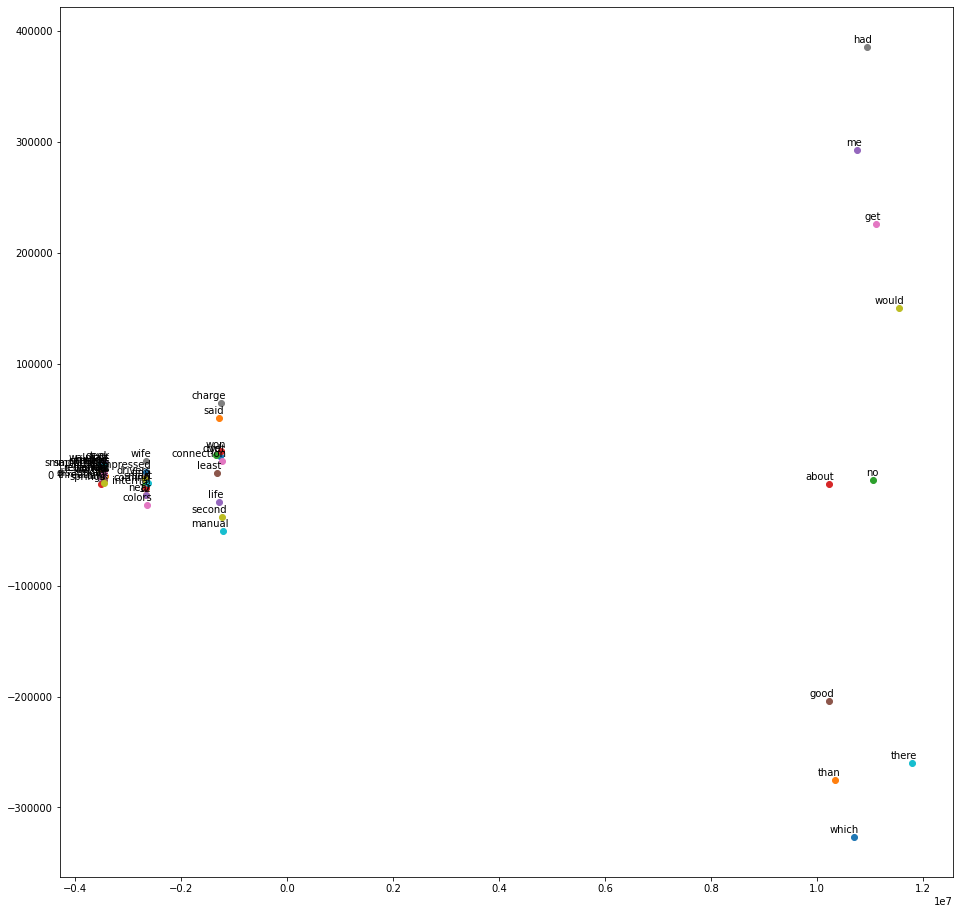